In [1]:
import sys
print(sys.version)

3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0]


In [237]:
# # install packages

# !pip install lightgbm
# !pip install xgboost
# !pip install mlxtend
# !pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import pickle
pickle.HIGHEST_PROTOCOL
pickle.DEFAULT_PROTOCOL

3

In [4]:
%matplotlib inline 

import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# import seaborn as sns
import joblib

# SK-learn libraries for machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import BayesianRidge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from lightgbm import *
# from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import xgboost

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# SK-learn libraries for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
pass

In [429]:
# df_n = pd.read_csv("pmn-ai/Madhukar/Dataset_with_NHD_variables/combined_regular_with_ssurgo_nhd_2.5kmX2.5km.csv")
df = pd.read_pickle("/pmn-ai/Madhukar/Dataset_with_NHD_variables/combined_regular_with_ssurgo_nhd_2.5kmX2.5km_pkl3_corrected.pkl")

In [430]:
for col in df.columns:
    print(str(col), ":", df.get(col).dtypes)

Unnamed: 0 : int64
Unnamed: 0.1 : int64
jurisdiction_type : object
da_number : object
district : object
project_name : object
longitude : float64
latitude : float64
date_issued_or_denied : object
rha_determination : int64
cwa_determination : int64
rha1 : int64
rha2 : int64
cwa1 : int64
cwa2 : int64
cwa3 : int64
cwa4 : int64
cwa5 : int64
cwa6 : int64
cwa7 : int64
cwa8 : int64
cwa9 : int64
potential_wetland : int64
index : int64
Index : int64
mukey : float64
hydclprs : float64
aws025wta : float64
drclassdcd : object
nhd_vars_wb : object
nhd_vars_fl : object
wb_comid_list : object
wb_ftype_str_list : object
wb_gnis_id_list : object
wb_area_list : object
fl_comid_list : object
fl_ftype_str_list : object
fl_gnis_id_list : object
fl_length_list : object
fl_areasqkm_sum : float64
fl_areasqkm_count : int64
fl_areasqkm_mean : float64
fl_gnis_name_ind_sum : float64
fl_gnis_name_ind_count : int64
fl_gnis_name_ind_mean : float64
fl_totdasqkm_sum : float64
fl_totdasqkm_count : int64
fl_totdasqkm_me

In [431]:
for col in df.columns:
    if df.get(col).dtypes == "object":
        print(str(col), ":", df.get(col).dtypes)

jurisdiction_type : object
da_number : object
district : object
project_name : object
date_issued_or_denied : object
drclassdcd : object
nhd_vars_wb : object
nhd_vars_fl : object
wb_comid_list : object
wb_ftype_str_list : object
wb_gnis_id_list : object
wb_area_list : object
fl_comid_list : object
fl_ftype_str_list : object
fl_gnis_id_list : object
fl_length_list : object
wb_comid : object
wb_ftype_str : object
fl_comid : object
fl_ftype_str : object
fl_gnis_id : object


# EDA


In [432]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'jurisdiction_type', 'da_number',
       'district', 'project_name', 'longitude', 'latitude',
       'date_issued_or_denied', 'rha_determination', 'cwa_determination',
       'rha1', 'rha2', 'cwa1', 'cwa2', 'cwa3', 'cwa4', 'cwa5', 'cwa6', 'cwa7',
       'cwa8', 'cwa9', 'potential_wetland', 'index', 'Index', 'mukey',
       'hydclprs', 'aws025wta', 'drclassdcd', 'nhd_vars_wb', 'nhd_vars_fl',
       'wb_comid_list', 'wb_ftype_str_list', 'wb_gnis_id_list', 'wb_area_list',
       'fl_comid_list', 'fl_ftype_str_list', 'fl_gnis_id_list',
       'fl_length_list', 'fl_areasqkm_sum', 'fl_areasqkm_count',
       'fl_areasqkm_mean', 'fl_gnis_name_ind_sum', 'fl_gnis_name_ind_count',
       'fl_gnis_name_ind_mean', 'fl_totdasqkm_sum', 'fl_totdasqkm_count',
       'fl_totdasqkm_mean', 'fl_flow_type_sum', 'fl_flow_type_count',
       'fl_flow_type_mean', 'fl_streamorde_sum', 'fl_streamorde_count',
       'fl_streamorde_mean', 'fl_intephem_sum', 'fl_intephem_count'

In [433]:
df.shape

(14619, 77)

In [434]:
num_features = df.describe().columns
type(num_features)
num_features

Index(['Unnamed: 0', 'Unnamed: 0.1', 'longitude', 'latitude',
       'rha_determination', 'cwa_determination', 'rha1', 'rha2', 'cwa1',
       'cwa2', 'cwa3', 'cwa4', 'cwa5', 'cwa6', 'cwa7', 'cwa8', 'cwa9',
       'potential_wetland', 'index', 'Index', 'mukey', 'hydclprs', 'aws025wta',
       'fl_areasqkm_sum', 'fl_areasqkm_count', 'fl_areasqkm_mean',
       'fl_gnis_name_ind_sum', 'fl_gnis_name_ind_count',
       'fl_gnis_name_ind_mean', 'fl_totdasqkm_sum', 'fl_totdasqkm_count',
       'fl_totdasqkm_mean', 'fl_flow_type_sum', 'fl_flow_type_count',
       'fl_flow_type_mean', 'fl_streamorde_sum', 'fl_streamorde_count',
       'fl_streamorde_mean', 'fl_intephem_sum', 'fl_intephem_count',
       'fl_intephem_mean', 'fl_startflag_sum', 'fl_startflag_count',
       'fl_startflag_mean', 'fl_divergence_sum', 'fl_divergence_count',
       'fl_divergence_mean', 'wb_area_sum', 'wb_area_count', 'wb_area_mean',
       'wb_gnis_name_ind_sum', 'wb_gnis_name_ind_count',
       'wb_gnis_name_ind_mean'

In [435]:
cat_features = list(set(df.columns) - set(num_features))
# type(pd.Series([cat_features]))
# pd.Series([cat_features])
cat_features

['wb_ftype_str_list',
 'wb_comid_list',
 'fl_gnis_id',
 'date_issued_or_denied',
 'fl_length_list',
 'nhd_vars_wb',
 'jurisdiction_type',
 'da_number',
 'fl_comid',
 'fl_comid_list',
 'wb_comid',
 'fl_ftype_str',
 'wb_ftype_str',
 'wb_area_list',
 'project_name',
 'nhd_vars_fl',
 'drclassdcd',
 'district',
 'fl_gnis_id_list',
 'fl_ftype_str_list',
 'wb_gnis_id_list']

In [436]:
df_num_features = pd.DataFrame(num_features)
df_num_features
# # features of interest: 2,3,5,8,9,10,11,12,13,14,15,16,17,19 and then 23 to 55
# imp_num_feature_list = [19, 2, 3]  + list(range(23, 56)) + list(range(8, 17)) + [5] 
imp_num_feature_list = [2, 3, 17]  + list(range(23, 56))
imp_num_feature = df_num_features.loc[imp_num_feature_list]
imp_num_feature = list(imp_num_feature.values.flatten())
imp_num_feature

['longitude',
 'latitude',
 'potential_wetland',
 'fl_areasqkm_sum',
 'fl_areasqkm_count',
 'fl_areasqkm_mean',
 'fl_gnis_name_ind_sum',
 'fl_gnis_name_ind_count',
 'fl_gnis_name_ind_mean',
 'fl_totdasqkm_sum',
 'fl_totdasqkm_count',
 'fl_totdasqkm_mean',
 'fl_flow_type_sum',
 'fl_flow_type_count',
 'fl_flow_type_mean',
 'fl_streamorde_sum',
 'fl_streamorde_count',
 'fl_streamorde_mean',
 'fl_intephem_sum',
 'fl_intephem_count',
 'fl_intephem_mean',
 'fl_startflag_sum',
 'fl_startflag_count',
 'fl_startflag_mean',
 'fl_divergence_sum',
 'fl_divergence_count',
 'fl_divergence_mean',
 'wb_area_sum',
 'wb_area_count',
 'wb_area_mean',
 'wb_gnis_name_ind_sum',
 'wb_gnis_name_ind_count',
 'wb_gnis_name_ind_mean',
 'fl_length_sum',
 'fl_length_count',
 'fl_length_mean']

In [437]:
df_cat_features = pd.DataFrame(cat_features)
df_cat_features


,0
0,wb_ftype_str_list
1,wb_comid_list
2,fl_gnis_id
3,date_issued_or_denied
4,fl_length_list
5,nhd_vars_wb
6,jurisdiction_type
7,da_number
8,fl_comid
9,fl_comid_list


In [438]:
# features of interest: 18
# imp_cat_feature_list = [18]
# imp_cat_feature = df_cat_features.loc[imp_cat_feature_list]
# imp_cat_feature = list(imp_cat_feature.values.flatten())
imp_cat_feature = ['district']

In [439]:
df1 = df[imp_cat_feature]
df2 = df[imp_num_feature]
df_X_combined_ordered = pd.concat([df2, df1], axis=1)
df_X_combined_ordered.columns



Index(['longitude', 'latitude', 'potential_wetland', 'fl_areasqkm_sum',
       'fl_areasqkm_count', 'fl_areasqkm_mean', 'fl_gnis_name_ind_sum',
       'fl_gnis_name_ind_count', 'fl_gnis_name_ind_mean', 'fl_totdasqkm_sum',
       'fl_totdasqkm_count', 'fl_totdasqkm_mean', 'fl_flow_type_sum',
       'fl_flow_type_count', 'fl_flow_type_mean', 'fl_streamorde_sum',
       'fl_streamorde_count', 'fl_streamorde_mean', 'fl_intephem_sum',
       'fl_intephem_count', 'fl_intephem_mean', 'fl_startflag_sum',
       'fl_startflag_count', 'fl_startflag_mean', 'fl_divergence_sum',
       'fl_divergence_count', 'fl_divergence_mean', 'wb_area_sum',
       'wb_area_count', 'wb_area_mean', 'wb_gnis_name_ind_sum',
       'wb_gnis_name_ind_count', 'wb_gnis_name_ind_mean', 'fl_length_sum',
       'fl_length_count', 'fl_length_mean', 'district'],
      dtype='object')

In [440]:
df_X_combined_ordered.dtypes

longitude                 float64
latitude                  float64
potential_wetland           int64
fl_areasqkm_sum           float64
fl_areasqkm_count           int64
fl_areasqkm_mean          float64
fl_gnis_name_ind_sum      float64
fl_gnis_name_ind_count      int64
fl_gnis_name_ind_mean     float64
fl_totdasqkm_sum          float64
fl_totdasqkm_count          int64
fl_totdasqkm_mean         float64
fl_flow_type_sum          float64
fl_flow_type_count          int64
fl_flow_type_mean         float64
fl_streamorde_sum         float64
fl_streamorde_count         int64
fl_streamorde_mean        float64
fl_intephem_sum           float64
fl_intephem_count           int64
fl_intephem_mean          float64
fl_startflag_sum          float64
fl_startflag_count          int64
fl_startflag_mean         float64
fl_divergence_sum         float64
fl_divergence_count         int64
fl_divergence_mean        float64
wb_area_sum               float64
wb_area_count               int64
wb_area_mean  

In [441]:
df_X_combined_dummies_ordered = pd.get_dummies(df_X_combined_ordered,drop_first=True)
# df_X_combined_dummies_ordered.columns

# # use the following to get feature names for OHE dataframe 
# # (first columns are numerical, last are OHE categorical)
# df_X_combined_dummies_ordered = pd.get_dummies(df_X_combined_ordered, \
#                                                drop_first=True) 

In [442]:
df[df.district == "Alaska"].shape # 451 records are in Alaska

(451, 77)

In [443]:
df.district.unique()

array(['Buffalo', 'Chicago', 'Detroit', 'Huntington', 'Louisville',
       'Nashville', 'Pittsburgh', 'Vicksburg', 'Memphis', 'New Orleans',
       'St. Paul', 'Rock Island', 'St. Louis', 'Baltimore', 'New England',
       'New York', 'Norfolk', 'Philadelphia', 'Kansas City', 'Omaha',
       'Portland', 'Seattle', 'Walla Walla', 'Alaska', 'Honolulu',
       'Charleston', 'Jacksonville', 'Mobile', 'Savannah', 'Wilmington',
       'Albuquerque', 'Sacramento', 'Los Angeles', 'San Francisco',
       'Fort Worth', 'Galveston', 'Little Rock', 'Tulsa'], dtype=object)

In [444]:
numericals_list = imp_num_feature 
categories_list = imp_cat_feature
print(numericals_list, categories_list, sep="\n\n")

['longitude', 'latitude', 'potential_wetland', 'fl_areasqkm_sum', 'fl_areasqkm_count', 'fl_areasqkm_mean', 'fl_gnis_name_ind_sum', 'fl_gnis_name_ind_count', 'fl_gnis_name_ind_mean', 'fl_totdasqkm_sum', 'fl_totdasqkm_count', 'fl_totdasqkm_mean', 'fl_flow_type_sum', 'fl_flow_type_count', 'fl_flow_type_mean', 'fl_streamorde_sum', 'fl_streamorde_count', 'fl_streamorde_mean', 'fl_intephem_sum', 'fl_intephem_count', 'fl_intephem_mean', 'fl_startflag_sum', 'fl_startflag_count', 'fl_startflag_mean', 'fl_divergence_sum', 'fl_divergence_count', 'fl_divergence_mean', 'wb_area_sum', 'wb_area_count', 'wb_area_mean', 'wb_gnis_name_ind_sum', 'wb_gnis_name_ind_count', 'wb_gnis_name_ind_mean', 'fl_length_sum', 'fl_length_count', 'fl_length_mean']

['district']


In [445]:
# impute categorical data

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
  """
  By inheriting TransformerMixin, you get fit_transform method for free 
  if you implement fit and transform methods
  """ 

  def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column.
        """
  def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X], 
            index=X.columns)
        return self

  def transform(self, X, y=None):
        return X.fillna(self.fill)

In [446]:
# Pipeline for numerical columns
# 1. fill NA's with median values
# 2. scale them
num_pipeline_impute_ss = Pipeline([        # should be list of tuples
                          ("num_imputer", SimpleImputer(strategy="median")),
                          ("std_scaler", StandardScaler())
                          ])                      

# Pipleline for categorical columns
# 1. fill NA's with most frequent values
# 2. one hot code

cat_pipeline_impute_ohe = Pipeline([("cat_imputer", DataFrameImputer()),
                         ("one_hot_encoder", OneHotEncoder(drop="first", \
                                                           sparse=False))
                         ])

In [447]:
# here trying to do numerical and categorical transformation in isolation
# this because ColumnTransformer removes column name information :-(
from sklearn.compose import ColumnTransformer

# only the cat columns will be one-hot encoded
partial_transformer_impute_ohe = ColumnTransformer([
                                   ("categorical_ohe", cat_pipeline_impute_ohe,\
                                    categories_list)
])

# only the numerical columns withh get standard scaling
partial_transformer_impute_ss = ColumnTransformer([
                                   ("numerical_ss_impute", num_pipeline_impute_ss,\
                                    numericals_list)
])

In [448]:
import random
#Generate 5 random numbers between 10 and 30
random.seed(1)
train_records = random.sample(range(0, 14500), 10000)
test_records = list(set(range(0, 14500)) - set(train_records))

df_train_new = df_X_combined_ordered.copy().iloc[train_records,]
df_test_new = df_X_combined_ordered.copy().iloc[test_records,]

n_rows = len(df_train_new)
# print(pd.DataFrame(df_train_new.columns))
len(df_train_new.columns) # 37
df_train_new.columns

Index(['longitude', 'latitude', 'potential_wetland', 'fl_areasqkm_sum',
       'fl_areasqkm_count', 'fl_areasqkm_mean', 'fl_gnis_name_ind_sum',
       'fl_gnis_name_ind_count', 'fl_gnis_name_ind_mean', 'fl_totdasqkm_sum',
       'fl_totdasqkm_count', 'fl_totdasqkm_mean', 'fl_flow_type_sum',
       'fl_flow_type_count', 'fl_flow_type_mean', 'fl_streamorde_sum',
       'fl_streamorde_count', 'fl_streamorde_mean', 'fl_intephem_sum',
       'fl_intephem_count', 'fl_intephem_mean', 'fl_startflag_sum',
       'fl_startflag_count', 'fl_startflag_mean', 'fl_divergence_sum',
       'fl_divergence_count', 'fl_divergence_mean', 'wb_area_sum',
       'wb_area_count', 'wb_area_mean', 'wb_gnis_name_ind_sum',
       'wb_gnis_name_ind_count', 'wb_gnis_name_ind_mean', 'fl_length_sum',
       'fl_length_count', 'fl_length_mean', 'district'],
      dtype='object')

### Identify X(variables) and Y(labels) columns

In [478]:
# df_train_new = df.copy().sample(frac=0.8, replace=False, random_state=1) # create copy
# df_test_new = df_test.copy()

# # sns.distplot(df_train_new.GrLivArea, kde=False, bins=200)
# # plt.xlabel("Gr Liv Area")
# # plt.ylabel("Count")

# df_train_new = df_train_new[df_train.GrLivArea < 4000] # remove 4 outliers >4000
# n_rows = len(df_train_new)

df_train_X = df_train_new.iloc[:,:37] # columns 0-37 are X data, discard rest of them
# df_train_X.columns
# df_train_Y = df_train_new.iloc[:,46] # label data, discard cwa_n determinations
df_train_Y = pd.DataFrame(df.cwa_determination).iloc[train_records,]
df_train_X
train_dev_labels = df_train_Y#[:n_rows]


df_test_X = df_test_new.iloc[:,0:37]
# df_test_X = df_test_X.drop(["Index"], axis=1)
df_test_Y = pd.DataFrame(df.cwa_determination).iloc[test_records,]
df_test_Y
# df_X_combined = pd.concat([df_train_X, df_test_X]) # combines df_X plus df_X_test



,cwa_determination
0,0
8194,1
4,1
6,1
8199,0
...,...
8178,1
8179,1
8182,1
8185,1


In [479]:
n_rows


10000

In [480]:
df_X_combined_ordered.shape
len(numericals_list) # 36
# len(categories_list) # 1

36

In [481]:
df_X_combined_ordered[categories_list].columns

df_X_combined_ordered.columns[len(numericals_list):]

Index(['district'], dtype='object')

In [482]:
# Transform categorical and numerical columns separately

# 1. One hot code full combined dataset's category columns using cat_ohe
partial_transformer_impute_ohe.fit(df_X_combined_ordered)
cat_data_OHE = partial_transformer_impute_ohe.transform(df_X_combined_ordered)
cat_data_OHE.shape #(2915, 208) spits out only only categorical columns
# convert into dataframe
df_cat_data_OHE = pd.DataFrame(cat_data_OHE, \
                               columns=df_X_combined_dummies_ordered.columns[len(numericals_list):])

# 2. impute and scale numerical columns
# fit on train+dev+test data
partial_transformer_impute_ss.fit(df_X_combined_ordered[numericals_list][:1100]) # first 39 numerical columns are pulled from df_X_combined_ordered
# ...then transform train+dev+test data
full_data_ohe_ss_imputed = partial_transformer_impute_ss.transform(df_X_combined_ordered[numericals_list]) # this is just the numerical columns

# slice out the train, dev and test AND train+dev
train_data_ohe_ss_imputed = full_data_ohe_ss_imputed[:1100] # train (1100, 39)
dev_data_ohe_ss_imputed = full_data_ohe_ss_imputed[1100:n_rows] # dev (356, 39)
test_data_ohe_ss_imputed = full_data_ohe_ss_imputed[n_rows:] # test (xxx, 39)
train_dev_data_ohe_ss_imputed = full_data_ohe_ss_imputed[:n_rows] # train+dev

# join vertically together numerical and categorical features of transformed train, dev, test
train_combined_rebuilt = np.hstack((train_data_ohe_ss_imputed, cat_data_OHE[:1100, :])) # train
dev_combined_rebuilt = np.hstack((dev_data_ohe_ss_imputed, cat_data_OHE[1100:n_rows, :])) #dev
test_combined_rebuilt = np.hstack((test_data_ohe_ss_imputed, cat_data_OHE[n_rows:, :])) # test
train_dev_combined_rebuilt = np.hstack((train_dev_data_ohe_ss_imputed, cat_data_OHE[:n_rows, :])) # train+dev

In [486]:
print(train_dev_combined_rebuilt.shape)
print(test_combined_rebuilt.shape)

(10000, 72)
(4619, 72)


In [483]:
from sklearn.metrics import make_scorer
def my_scoring_func(y_predict, y_true):
  """
  Returns RMSE
  """
  
  error = y_predict - y_true
  return -np.sqrt(np.mean(error**2)) # negative because the some sklearn estimators expect 'greater_is_better=True' in make_scorer

my_scorer = make_scorer(my_scoring_func, greater_is_better=True)

In [489]:
print(train_dev_combined_rebuilt.shape)
print(train_dev_labels.shape)

(10000, 72)
(10000, 1)


In [488]:
pc2.shape

(10000,)

In [491]:
def P2(n_components, data): # from Project 3!
  """
  Takes target dimensionality reduction (k) and the data to reduce
  Returns the reduced data
  """
  
  pca = PCA(n_components)
  pca.fit(data)
  reduced_data = pca.transform(data)
  return reduced_data 

# Dimension reduction
reduced_train_data = P2(n_components=2, data=train_dev_combined_rebuilt)
pc1, pc2 = reduced_train_data[:, 0], reduced_train_data[:, 1]

# import seaborn as sns
# colors = ["g", "r"]
# fig, ax = plt.subplots(figsize=(5, 5))
# sns.set_palette(sns.color_palette(colors))
# sns.scatterplot(x=pc1, y=pc2, hue=train_dev_labels)
# ax.set_xlabel("PC1")
# ax.set_ylabel("PC2")
# pass

ValueError: Shape of passed values is (1, 3), indices imply (10000, 3)

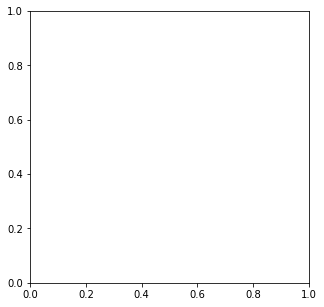

In [492]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def P3(train_data):
    pca=PCA(n_components=2)
    pca.fit(train_data)
    reduced_train_data = pca.transform(train_data)

    for n_clusters in [20]:
        kmeans=KMeans(n_clusters=n_clusters,random_state=0)
        kmeans.fit(reduced_train_data)

        colors = ["g", "r"]
        fig, ax = plt.subplots(figsize=(5, 5))
        X, Y = reduced_train_data[:, 0], reduced_train_data[:, 1]
        sns.scatterplot(x=X, y=Y, hue=train_dev_labels)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")

        for i in range(n_clusters):
            radii = cdist(reduced_train_data[kmeans.labels_ == i], [kmeans.cluster_centers_[i]], metric="euclidean").max()
            circle = plt.Circle(kmeans.cluster_centers_[i], radii, color="#00000000", ec="blue")
            ax.add_patch(circle)
            plt.text(kmeans.cluster_centers_[i][0]-0.25,kmeans.cluster_centers_[i][1]-0.25,str(i+1),color="black",size=11)

        ax.set_title("6-Mean Clusters")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        #plt.show()
        
P3(train_dev_combined_rebuilt)

In [ ]:
# outlier removal in cluster 19
kmeans_outliers_logical = (pc1 < 750)*1

ValueError: Shape of passed values is (1, 3), indices imply (10000, 3)

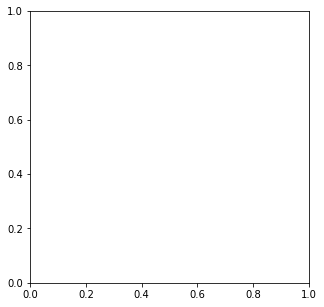

In [470]:
# re-run clustering on the filtered data
# keep track of the train_labels!
# Summary: no new outlliers

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def P3(train_data):
    pca=PCA(n_components=2)
    pca.fit(train_data)
    reduced_train_data = pca.transform(train_data)

    for n_clusters in [6]:
        kmeans=KMeans(n_clusters=n_clusters,random_state=0)
        kmeans.fit(reduced_train_data)

        colors = ["g", "r"]
        fig, ax = plt.subplots(figsize=(5, 5))
        X, Y = reduced_train_data[:, 0], reduced_train_data[:, 1]
        sns.scatterplot(x=X, y=Y, hue=train_dev_labels) #[kmeans_outliers_logical])
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")

        for i in range(n_clusters):
            radii = cdist(reduced_train_data[kmeans.labels_ == i], [kmeans.cluster_centers_[i]], metric="euclidean").max()
            circle = plt.Circle(kmeans.cluster_centers_[i], radii, color="#00000000", ec="blue")
            ax.add_patch(circle)
            plt.text(kmeans.cluster_centers_[i][0]-0.25,kmeans.cluster_centers_[i][1]-0.25,str(i+1),color="black",size=11)

        ax.set_title("6-Mean Clusters")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        #plt.show()
        
# pass in the filtered data here        
# P3(train_dev_combined_rebuilt_kmeans)
P3(train_dev_combined_rebuilt)

In [ ]:
def P2(n_components, data):
  """
  Takes target dimensionality reduction (k) and the data to reduce
  Returns the reduced data
  """
  
  pca = PCA(n_components)
  pca.fit(data)
  reduced_data = pca.transform(data)
  return reduced_data 

# note the filtered version of data passed in here
reduced_train_data = P2(n_components=10, data=train_dev_combined_rebuilt)
pc3, pc4 = reduced_train_data[:, 2], reduced_train_data[:, 3]

import seaborn as sns
colors = ["g", "r"]
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_palette(sns.color_palette(colors))

# note the filtered version of labels passed in here
sns.scatterplot(x=pc3, y=pc4, hue=train_dev_labels)

ax.set_xlabel("PC3")
ax.set_ylabel("PC4")
pass

ValueError: Shape of passed values is (1, 3), indices imply (10000, 3)

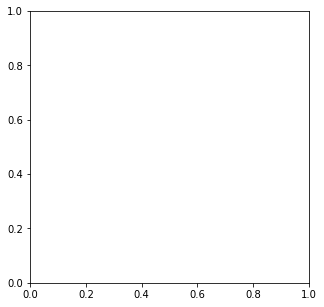

In [471]:
# So, lets look again in pc1 vs pc2 so on

def P2(n_components, data):
  """
  Takes target dimensionality reduction (k) and the data to reduce
  Returns the reduced data
  """
  
  pca = PCA(n_components)
  pca.fit(data)
  reduced_data = pca.transform(data)
  return reduced_data 

# note the filtered version of data passed in here
reduced_train_data = P2(n_components=10, data=train_dev_combined_rebuilt)
pc4, pc5 = reduced_train_data[:, 3], reduced_train_data[:, 4]

import seaborn as sns
colors = ["g", "r"]
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_palette(sns.color_palette(colors))

# note the filtered version of labels passed in here
sns.scatterplot(x=pc4, y=pc5, hue=train_dev_labels)

ax.set_xlabel("PC4")
ax.set_ylabel("PC5")
pass

ValueError: Shape of passed values is (1, 3), indices imply (10000, 3)

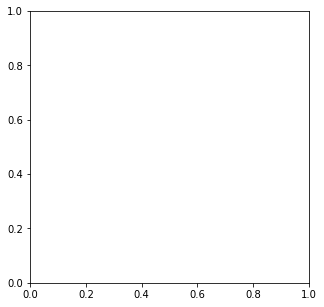

In [472]:
# So, lets look again in pc1 vs pc2 so on

def P2(n_components, data):
  """
  Takes target dimensionality reduction (k) and the data to reduce
  Returns the reduced data
  """
  
  pca = PCA(n_components)
  pca.fit(data)
  reduced_data = pca.transform(data)
  return reduced_data 

# note the filtered version of data passed in here
reduced_train_data = P2(n_components=10, data=train_dev_combined_rebuilt)
pc5, pc6 = reduced_train_data[:, 4], reduced_train_data[:, 5]

import seaborn as sns
colors = ["g", "r"]
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_palette(sns.color_palette(colors))

# note the filtered version of labels passed in here
sns.scatterplot(x=pc5, y=pc6, hue=train_dev_labels)

ax.set_xlabel("PC5")
ax.set_ylabel("PC6")
pass

ValueError: Shape of passed values is (1, 3), indices imply (10000, 3)

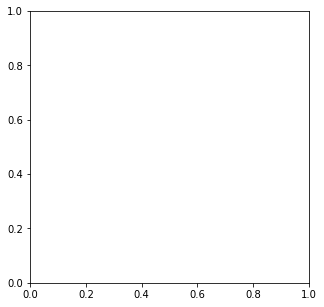

In [473]:
# So, lets look again in pc1 vs pc2 so on

def P2(n_components, data):
  """
  Takes target dimensionality reduction (k) and the data to reduce
  Returns the reduced data
  """
  
  pca = PCA(n_components)
  pca.fit(data)
  reduced_data = pca.transform(data)
  return reduced_data 

# note the filtered version of data passed in here
reduced_train_data = P2(n_components=10, data=train_dev_combined_rebuilt)
pc6, pc7 = reduced_train_data[:, 5], reduced_train_data[:, 6]

import seaborn as sns
colors = ["g", "r"]
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_palette(sns.color_palette(colors))

# note the filtered version of labels passed in here
sns.scatterplot(x=pc6, y=pc7, hue=train_dev_labels)

ax.set_xlabel("PC6")
ax.set_ylabel("PC7")
pass

In [419]:
outliers_kmeans = kmeans_outliers_logical
outliers_pca_round1 = ((pc4 < 40)*1)
# outliers_pca_round2 = ((pc4 < 40)*1)
kmeans_outliers_logical = outliers_kmeans * outliers_pca_round1# * outliers_pca_round2
kmeans_outliers_logical = kmeans_outliers_logical==1
train_dev_combined_rebuilt_kmeans = train_dev_combined_rebuilt[kmeans_outliers_logical]
print(train_dev_combined_rebuilt_kmeans.shape)

ValueError: operands could not be broadcast together with shapes (10000,) (9982,) 

In [ ]:
# rename the filtered data to original object names
train_dev_combined_rebuilt = train_dev_combined_rebuilt_kmeans
train_dev_labels = train_dev_labels[kmeans_outliers_logical]

In [ ]:
train_dev_combined_rebuilt.shape

In [ ]:
train_dev_labels.shape

# Modeling

## KNN Classifier

In [373]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_fit = knn_clf.fit(train_dev_combined_rebuilt, train_dev_labels)
y_true = df_test_Y
y_predict = knn_fit.predict(test_combined_rebuilt)
confusion_matrix(y_true, y_predict)


array([[1722, 1125],
       [ 984,  669]])

In [374]:
tn, fp, fn, tp = confusion_matrix(y_true, y_predict).ravel()
(tn, fp, fn, tp)

(1722, 1125, 984, 669)

In [368]:
train_dev_combined_rebuilt.shape

(9982, 72)

In [97]:
df_test_X.shape

(4500, 37)

RMSE: inf
R-squared: nan
Slope: nan
Slope (in degs): nan



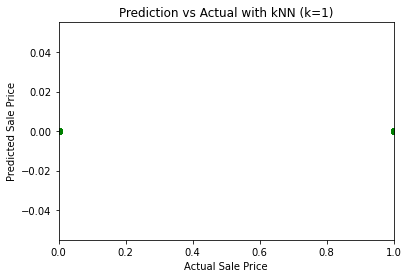

In [76]:
knn_reg = KNeighborsClassifier(n_neighbors=1)
y_predict = cross_val_predict(knn_reg, train_dev_combined_rebuilt, train_dev_labels)
print("RMSE:", -my_scoring_func(np.log(y_predict), train_dev_labels))

slope, intercept, r_value, p_value, std_err = stats.linregress(train_dev_labels, np.log(y_predict))
ax = sns.regplot(train_dev_labels, np.log(y_predict))
ax.set_title("Prediction vs Actual with kNN (k=1)")
ax.set_xlabel("Actual Sale Price")
ax.set_ylabel("Predicted Sale Price")
print("R-squared:", round(r_value, 3))
print("Slope:", round(slope, 3))
print("Slope (in degs):", round(np.arctan(slope)*180/np.pi, 2))
print()